In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### 1. データの読み込み

In [2]:
df_origin = pd.read_csv("ks-projects-201801.csv")

# データ表示
display(df_origin.head())

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [51]:
# 有効データ数を確認
# いくつかデータ欠損しているカラムはあるが、最大使えるレコード数は「378661」レコード
display(df_origin.count())

ID                  378661
name                378657
category            378661
main_category       378661
currency            378661
deadline            378661
goal                378661
launched            378661
pledged             378661
state               378661
backers             378661
country             378661
usd pledged         374864
usd_pledged_real    378661
usd_goal_real       378661
dtype: int64

In [52]:
# カラムのデータ型確認
# 数値であったほしいカラムは数値型であることを確認
display(df_origin.dtypes)

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [53]:
# 目的変数となるカラム「state」のユニークな値とその出現回数をカウント
display(df_origin["state"].value_counts())

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

### 2. グラフ化

#### 2-1 グラフ化するためのデータを用意

In [3]:
# 「成功」か「失敗」だけのレコードを抽出(成功か失敗かで完了してしまっているデータ)
df_success_or_failed = df_origin[(df_origin["state"] == "successful") | (df_origin["state"] == "failed")]
# 抽出できたことを確認
display(df_success_or_failed["state"].value_counts())

failed        197719
successful    133956
Name: state, dtype: int64

In [4]:
# カテゴリ変数の数値化
# 確実に不要な「ID」と「name」カラムは削除する
df_success_or_failed = df_success_or_failed.drop("ID", axis = 1)
df_success_or_failed = df_success_or_failed.drop("name", axis = 1)

In [5]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoderでカテゴリ変数を数値化
le = LabelEncoder()
# 「fit」と「transform」を分けることも出来る（fitで変換式を保存しておいて、fitの戻り値を使いまわすことができる）
# 数値化した列には「_class」を付加した列としてセットする
df_success_or_failed["category_class"] = le.fit_transform(df_success_or_failed["category"])
df_success_or_failed["main_category_class"] = le.fit_transform(df_success_or_failed["main_category"])
df_success_or_failed["currency_class"] = le.fit_transform(df_success_or_failed["currency"])
df_success_or_failed["state_class"] = le.fit_transform(df_success_or_failed["state"])
df_success_or_failed["country_class"] = le.fit_transform(df_success_or_failed["country"])

In [6]:
# カラムを並び変えたDataFrame作成
df_success_or_failed = df_success_or_failed.loc[:, ["category", "category_class",
                                                       "main_category", "main_category_class",
                                                        "state", "state_class",
                                                       "currency", "currency_class",
                                                       "deadline", "goal", "launched", "pledged",
                                                       "backers",
                                                       "country", "country_class",
                                                       "usd pledged", "usd_pledged_real", "usd_goal_real"]]
# 見やすいようにソートする
df_success_or_failed = df_success_or_failed.sort_values(by=["category_class", "main_category_class", "state_class"], 
                                                        ascending=[True, True, False])
display(df_success_or_failed.head())

,category,category_class,main_category,main_category_class,state,state_class,currency,currency_class,deadline,goal,launched,pledged,backers,country,country_class,usd pledged,usd_pledged_real,usd_goal_real
1000,3D Printing,0,Technology,13,successful,1,USD,13,2014-09-10,25000.0,2014-08-11 17:03:52,118923.50,290,US,22,118923.50,118923.50,25000.00
1084,3D Printing,0,Technology,13,successful,1,EUR,4,2015-06-11,30000.0,2015-05-12 09:42:41,40581.00,149,DE,5,45283.87,45531.66,33659.83
5028,3D Printing,0,Technology,13,successful,1,CAD,1,2013-10-20,50000.0,2013-09-20 23:21:14,651091.16,4420,CA,3,636502.52,623770.03,47901.90
8868,3D Printing,0,Technology,13,successful,1,CAD,1,2016-08-24,25000.0,2016-07-26 22:45:15,216288.98,84,CA,3,27244.69,167874.09,19403.91
10888,3D Printing,0,Technology,13,successful,1,USD,13,2017-04-24,30000.0,2017-03-21 17:20:36,254412.00,266,US,22,56808.00,254412.00,30000.00


クラウドファンディング前に分からない情報  
pledged：支援金の量  
backers：支援者数   
usd pledged：「pledged」をUSD換算したデータ(conversion made by KS)  
usd_pledged_real：「pledged」をUSD換算したデータ(conversion made by fixer.io api)  

これらは予測には使えないので削除する  

また「goal」の通貨は統一されていないので、USDで統一されている「usd_goal_real」を使用するので「goal」も削除する

In [7]:
for col in ["pledged", "backers", "usd pledged", "usd_pledged_real", "goal"]:
    df_success_or_failed = df_success_or_failed.drop(col, axis = 1)

「launched」と「deadline」はこのままでは使えないので、  
「launched」と「deadline」から「クラウドファンディング期間」という新しい説明変数を作る

In [60]:
pd.to_datetime(df_success_or_failed["launched"], format = "%Y-%m-%d %H:%M:%S")
deadline_time = pd.to_datetime(df_success_or_failed["deadline"], format = "%Y-%m-%d %H:%M:%S")

#### 2-2 グラフ化してみる

#### 散布図行列

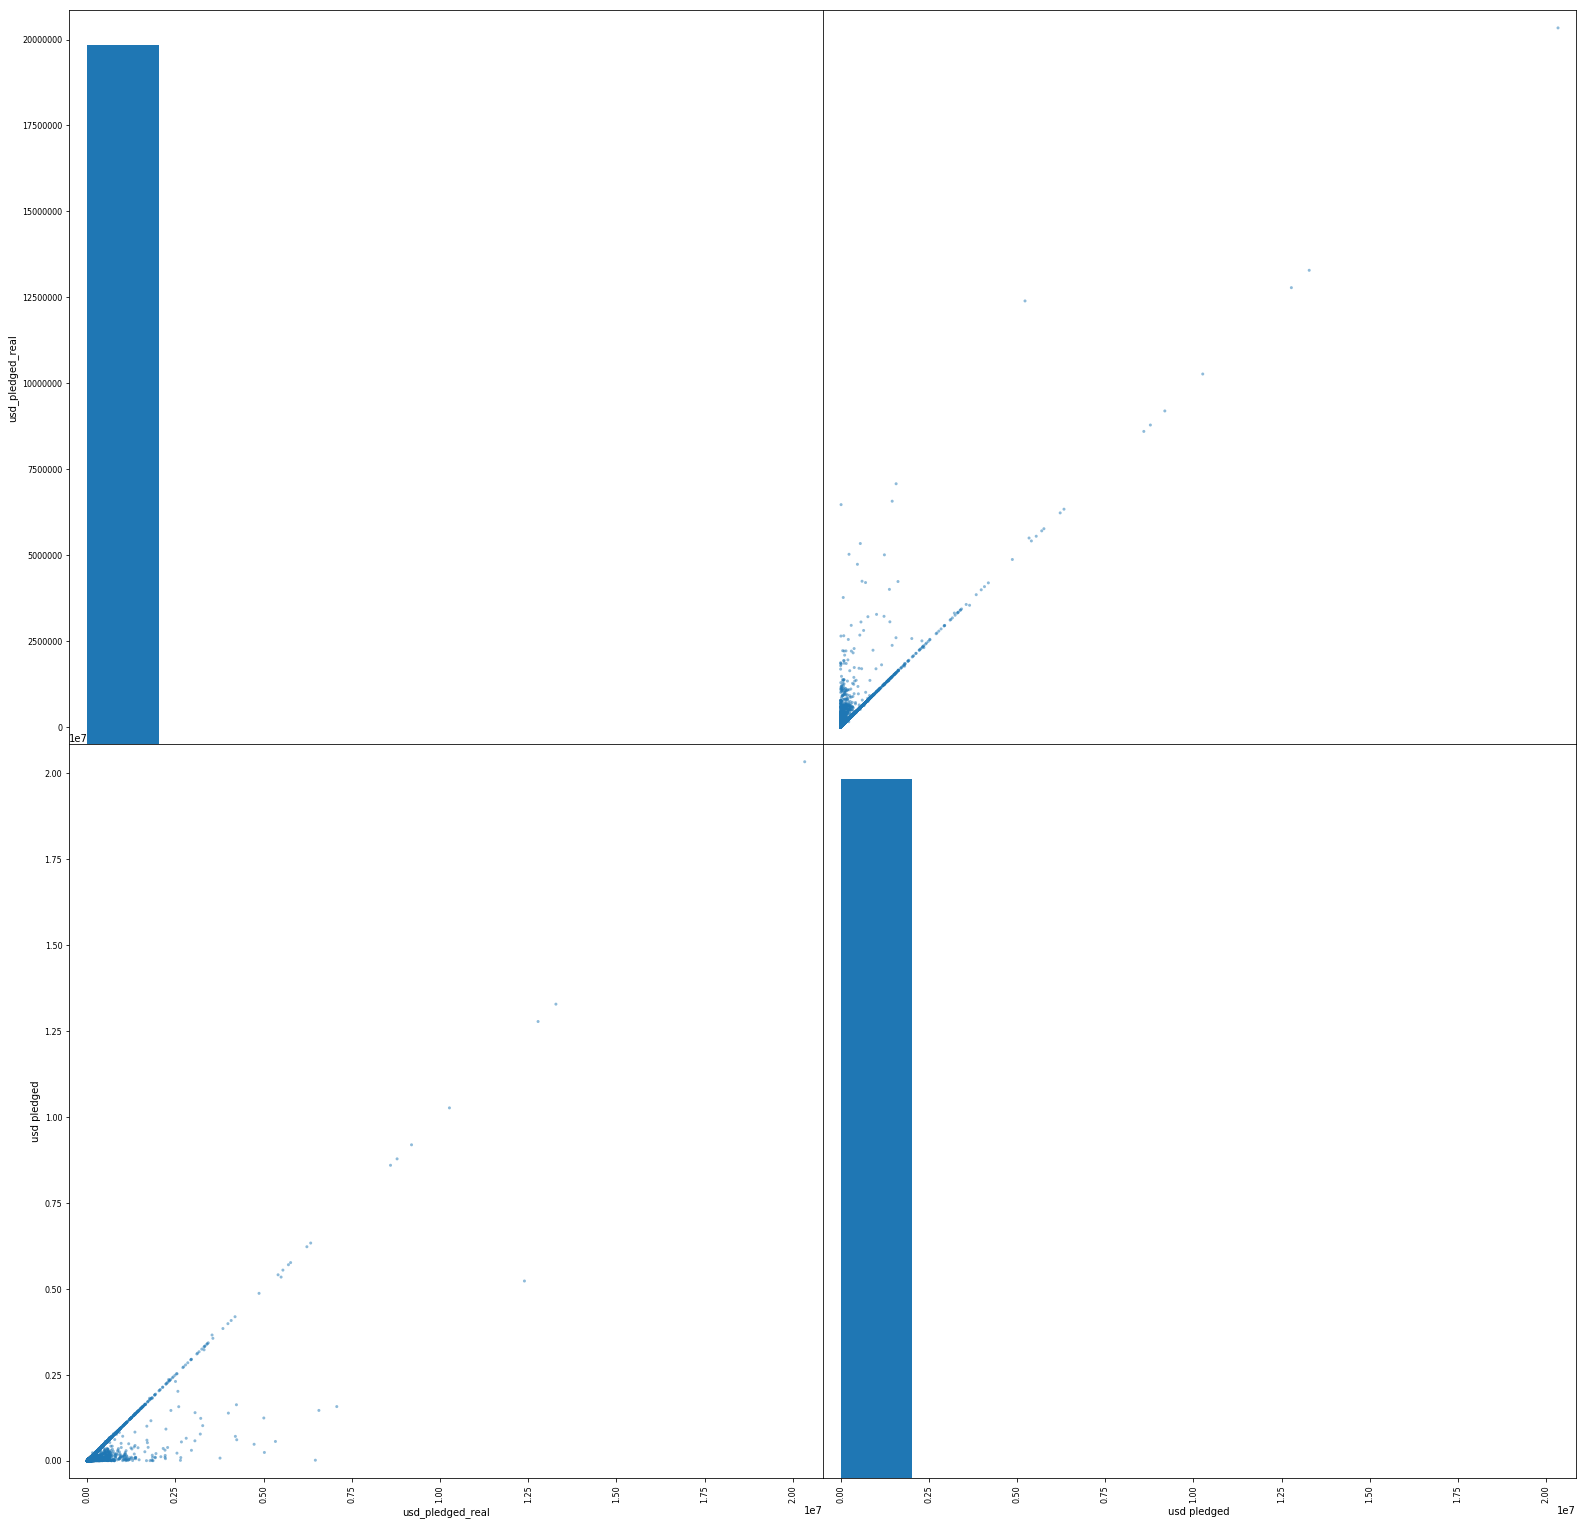

In [28]:
df_for_scatter_matrix = df_success_or_failed[["usd_pledged_real", "usd pledged"]]
pd.plotting.scatter_matrix(df_for_scatter_matrix, figsize = (27, 27))
plt.show()

In [17]:
df_success_or_failed.groupby(["country", "state"]).count()

category  category_class  main_category  \
country state                                                 
AT      failed           378             378            378   
        successful       107             107            107   
AU      failed          4606            4606           4606   
        successful      2010            2010           2010   
BE      failed           371             371            371   
        successful       152             152            152   
CA      failed          8236            8236           8236   
        successful      4134            4134           4134   
CH      failed           465             465            465   
        successful       187             187            187   
DE      failed          2499            2499           2499   
        successful       937             937            937   
DK      failed           566             566            566   
        successful       360             360            360   
ES      failed          1381            1381           1381   
        successful       492             492            492   
FR      failed          1612            1612           1612   
        successful       908             908            908   
GB      failed         17387           17387          17387   
        successful     12067           12067          12067   
HK      failed           261             261            261   
        successful       216             216            216   
IE      failed           476             476            476   
        successful       207             207            207   
IT      failed          1930            1930           1930   
        successful       439             439            439   
JP      failed            16              16             16   
        successful         7               7              7   
LU      failed            38              38             38   
        successful        19              19             19   
MX      failed          1015            1015           1015   
        successful       396             396            396   
N,0"    failed           105             105            105   
        successful       105             105            105   
NL      failed          1794            1794           1794   
        successful       617             617            617   
NO      failed           420             420            420   
        successful       162             162            162   
NZ      failed           826             826            826   
        successful       448             448            448   
SE      failed          1000            1000           1000   
        successful       509             509            509   
SG      failed           276             276            276   
        successful       178             178            178   
US      failed        152061          152061         152061   
        successful    109299          109299         109299   

                    main_category_class  state_class  currency  \
country state                                                    
AT      failed                      378          378       378   
        successful                  107          107       107   
AU      failed                     4606         4606      4606   
        successful                 2010         2010      2010   
BE      failed                      371          371       371   
        successful                  152          152       152   
CA      failed                     8236         8236      8236   
        successful                 4134         4134      4134   
CH      failed                      465          465       465   
        successful                  187          187       187   
DE      failed                     2499         2499      2499   
        successful                  937          937       937   
DK      failed                      566          566       566   
     